In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from msfm.utils import files

In [2]:
# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# 246pt in inches (for the Phys Rev template)
linewidth = 3.41
full_linewidth = 7.06

# colors = sns.color_palette("colorblind")
colors = sns.color_palette(["#984464", "#5eccab", "#00678a", "#e6a176",])

colors

[(0.596078431372549, 0.26666666666666666, 0.39215686274509803),
 (0.3686274509803922, 0.8, 0.6705882352941176),
 (0.0, 0.403921568627451, 0.5411764705882353),
 (0.9019607843137255, 0.6313725490196078, 0.4627450980392157)]

# certain

In [3]:
# fig, ax = plt.subplots(figsize=(linewidth, 2*0.66*linewidth), nrows=2, sharex=False)

# samples = ["metacal", "maglim"]

# for i, sample in enumerate(samples):
#     tomo_z, tomo_nz = files.load_redshift_distributions(sample)

#     for j, (z, nz) in enumerate(zip(tomo_z, tomo_nz)):
#         ax[i].plot(z, nz, label=j+1, color=colors[j])
        
#     ax[i].grid(True)
#     ax[i].set_yticks([])

# ax[0].legend(title=r"$z$ bin", loc="upper right")
# # ax[0].set(ylabel=r"\textsc{Metacalibration} $n(z)$", xlim=(0, 2), ylim=(0, 0.03))
# ax[0].set(ylabel=r"sources $n_{\textsc{Metacal}}(z)$", xlim=(0, 2), ylim=(0, 0.03))
# ax[0].tick_params(direction="in")
# ax[0].set_xticklabels([])

# # ax[1].set(xlabel=r"$z$", ylabel=r"\textsc{Maglim} $n(z)$", xlim=(0, 2), ylim=(0, 0.07))
# ax[1].set(xlabel=r"$z$", ylabel=r"lenses $n_{\textsc{Maglim}}(z)$", xlim=(0, 2), ylim=(0, 0.07))
# ax[1].tick_params(direction="in")

# fig.tight_layout(h_pad=0)
# fig.savefig("plots/redshift_distributions.pdf", bbox_inches="tight")

In [4]:
# fig, ax = plt.subplots(figsize=(linewidth, 2*0.66*linewidth), nrows=2, sharex=True)

# samples = ["metacal", "maglim"]
# colors = sns.color_palette("colorblind")

# for i, sample in enumerate(samples):
#     tomo_z, tomo_nz = files.load_redshift_distributions(sample)

#     for j, (z, nz) in enumerate(zip(tomo_z, tomo_nz)):
#         ax[i].plot(z, nz, label=j+1, color=colors[j])
        
#     if sample == "metacal":
#         pass

#     ax[i].grid(True)
#     ax[i].set_yticks([])

# ax[0].legend(title=r"$z$ bin", loc="upper right")
# ax[0].set(title=r"\textsc{Metacalibration}", ylabel=r"$n(z)$", xlim=(0, 2))
# ax[1].set(title=r"\textsc{Maglim}", xlabel=r"$z$", ylabel=r"$n(z)$", xlim=(0, 2))
# fig.tight_layout()
# fig.savefig("plots/redshift_distributions.pdf", bbox_inches="tight")

# uncertain

In [6]:
metainfo = np.load("/Users/arne/git/multiprobe-simulation-forward-model/data/CosmoGridV11_original_metainfo.npy")
print(metainfo.dtype.names)

# get the grid
metainfo = metainfo[metainfo["sobol_index"] != -999]

('As', 'H0', 'O_cdm', 'O_nu', 'Ob', 'Ol', 'Om', 'bary_Mc', 'bary_nu', 'benchmark_type', 'box_size_Mpc_over_h', 'delta', 'id_param', 'm_nu', 'n_particles', 'n_shells', 'n_steps', 'ns', 'path_par', 'row_id_parslist', 's8', 'sobol_index', 'w0', 'wa', 'dirname_perm', 'halton_point_id', 'id_perm', 'metacal1__delta_meanz', 'metacal1__delta_sigmaz', 'metacal2__delta_meanz', 'metacal2__delta_sigmaz', 'metacal3__delta_meanz', 'metacal3__delta_sigmaz', 'metacal4__delta_meanz', 'metacal4__delta_sigmaz', 'maglim1__delta_meanz', 'maglim1__delta_sigmaz', 'maglim2__delta_meanz', 'maglim2__delta_sigmaz', 'maglim3__delta_meanz', 'maglim3__delta_sigmaz', 'maglim4__delta_meanz', 'maglim4__delta_sigmaz')


25-06-30 15:03:45     files.py WAR   Loading the default config from /Users/arne/git/multiprobe-simulation-forward-model/configs/config.yaml 


25-06-30 15:03:45     files.py WAR   Loading the default config from /Users/arne/git/multiprobe-simulation-forward-model/configs/config.yaml 


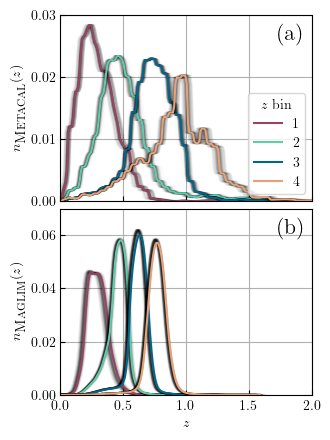

In [7]:
random_indices = np.random.choice(metainfo.shape[0], 100, replace=False)

fig, ax = plt.subplots(figsize=(linewidth, 2*0.66*linewidth), nrows=2, sharex=False)

samples = ["metacal", "maglim"]

for i, sample in enumerate(samples):
    tomo_z, tomo_nz = files.load_redshift_distributions(sample)

    for j, (z, nz) in enumerate(zip(tomo_z, tomo_nz)):
        for k in random_indices:
            # TODO check if this is correct!
            # (18), (19) and (21) in https://arxiv.org/pdf/2105.13546
            meanz = np.sum(nz*z)
            delta_meanz = metainfo[k][f"{sample}{j%4+1}__delta_meanz"]
            delta_sigmaz = metainfo[k][f"{sample}{j%4+1}__delta_sigmaz"]

            z_noisy = (z - meanz - delta_meanz)/(1 + delta_meanz) + meanz
            nz_noisy = nz/(1 + delta_sigmaz)
            
            ax[i].plot(z_noisy, nz_noisy, color="k", alpha=0.02)
            # ax[i].plot(z_noisy, nz_noisy, color=colors[j], alpha=0.02)
        
        ax[i].plot(z, nz, label=j+1, color=colors[j])
    ax[i].grid(True)
    # ax[i].set_yticks([])

ax[0].text(0.865, 0.95, '(a)', transform=ax[0].transAxes, fontsize=16, verticalalignment='top', weight='bold')
ax[1].text(0.865, 0.95, '(b)', transform=ax[1].transAxes, fontsize=16, verticalalignment='top', weight='bold')

ax[0].legend(title=r"$z$ bin", loc="lower right")
ax[0].set(ylabel=r"$n_{\textsc{Metacal}}(z)$", xlim=(0, 2), ylim=(0, 0.03))
ax[0].tick_params(direction="in")
ax[0].set_xticklabels([])
ax[0].set_yticks([0.0, 0.01, 0.02, 0.03])

ax[1].set(xlabel=r"$z$", ylabel=r"$n_{\textsc{Maglim}}(z)$", xlim=(0, 2), ylim=(0, 0.07))
ax[1].tick_params(direction="in")
ax[1].set_yticks([0.0, 0.02, 0.04, 0.06])

fig.tight_layout(h_pad=0)
fig.savefig("plots/noisy_redshift_distributions.pdf", bbox_inches="tight")
# fig.savefig("plots/noisy_redshift_distributions.png", bbox_inches="tight", dpi=300)

In [ ]:
metainfo["maglim4__delta_sigmaz"]

array([-0.0204    , -0.02608562, -0.02516816, ..., -0.0183886 ,
       -0.01812701, -0.01784687], dtype=float32)